# Praktikum 2

## Langkah 1 - Ilustrasi Data Non-Linier

### Langkah 1a - Import Library

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Langkah 1b - Buat Kembali Fungsi Plotting

In [2]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Langkah 1c - Buat Data Dummy Non-Linier

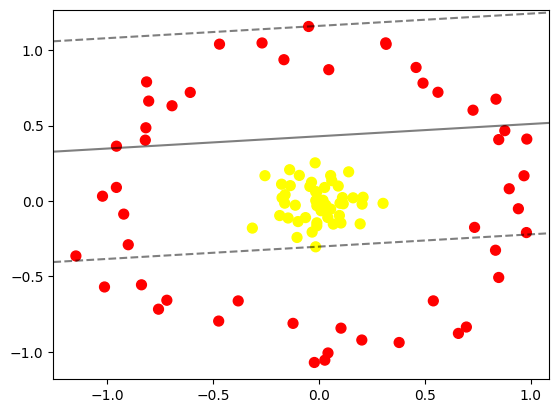

In [3]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [7]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# hitung proyeksi radial
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.11441634, -0.01846452],
       [-0.01817173,  0.25271539],
       [-0.01031516, -0.16473769],
       [-0.31465316, -0.17964133],
       [ 0.72730991,  0.60173751],
       [-0.0158886 ,  0.06132833],
       [-0.60793166,  0.71946528],
       [-1.02217744,  0.03178536],
       [ 0.84872832,  0.40678285],
       [ 0.01097243, -0.06071015],
       [ 0.98124276,  0.4103031 ],
       [-0.1356846 ,  0.10167501],
       [ 0.20358218, -0.02083699],
       [ 0.01896818,  0.0047456 ],
       [ 0.04614753,  0.87015862],
       [-0.11189557, -0.02798382],
       [-0.01047576,  0.05982638],
       [ 0.14002871,  0.19318331],
       [-0.0353105 ,  0.12399225],
       [ 0.45836056,  0.88490579],
       [ 0.00350999, -0.00397079],
       [ 0.3171351 ,  1.03817129],
       [-0.16555886,  0.93632302],
       [-0.90062376, -0.28987522],
       [ 0.302533  , -0.01560288],
       [-0.09889095, -0.13631407],
       [-0.01014488, -0.14470337],
       [-0.46975427,  1.03933015],
       [ 0.96804107,  0.16723212],
       [ 0.89823814,  0.08110387],
       [-0.26887963,  1.04725021],
       [ 0.06034581,  0.13463981],
       [ 0.53981619, -0.66190469],
       [ 0.02799897, -0.05872893],
       [ 0.31505097,  1.04788292],
       [-0.17672553,  0.11131487],
       [ 0.09629938, -0.09603476],
       [ 0.1608871 ,  0.0209846 ],
       [-0.06363495, -0.1101101 ],
       [ 0.83581739,  0.6747573 ],
       [ 0.49117438,  0.78096777],
       [-0.01525951,  0.00318831],
       [-0.83814815, -0.5554352 ],
       [ 0.09084203,  0.09898195],
       [ 0.87745447,  0.46619527],
       [ 0.10359477, -0.14578778],
       [-0.14579585, -0.11277963],
       [ 0.94150016, -0.05136336],
       [ 0.05502955,  0.16865425],
       [ 0.04145775, -0.10932928],
       [ 0.97953164, -0.20923759],
       [ 0.02757757, -1.05481934],
       [ 0.06753876, -0.15316407],
       [ 0.19440624, -0.15162268],
       [-0.69395622,  0.63102907],
       [-1.01281137, -0.56982117],
       [-0.13860237,  0.20722669],
       [-0.81744934,  0.48518391],
       [-0.47363295, -0.79574678],
       [-0.09283938,  0.16956681],
       [ 0.11069619,  0.02234334],
       [-0.71837306, -0.65774162],
       [ 0.01009372, -0.0645555 ],
       [-0.12259468, -0.81099676],
       [-0.3814785 , -0.66212236],
       [ 0.0991634 , -0.01482268],
       [ 0.69593806, -0.83525119],
       [-0.25516983,  0.16772678],
       [-0.92199366, -0.08703881],
       [-0.16001589,  0.04175515],
       [-0.95664616,  0.08999777],
       [ 0.84863051, -0.50684112],
       [ 0.56176531,  0.7205504 ],
       [-0.17446678,  0.02117597],
       [-0.95637323,  0.36320541],
       [ 0.20218151, -0.92131827],
       [-0.18544111, -0.09654474],
       [ 0.8335283 , -0.32632718],
       [-0.04310482,  0.09626749],
       [-0.82013735,  0.40331535],
       [-0.8041069 ,  0.66214842],
       [ 0.37843282, -0.93778178],
       [-0.01571288, -0.30370308],
       [-0.75771954, -0.71706681],
       [-1.14786141, -0.36414273],
       [-0.10372043, -0.24166956],
       [ 0.10389291, -0.84274868],
       [-0.81410895,  0.78916858],
       [ 0.05504556, -0.05349411],
       [ 0.0322069 , -0.02710156],
       [-0.03243166, -0.2060639 ],
       [-0.02198402, -1.07016613],
       [ 0.04253054, -1.00716667],
       [ 0.02654793,  0.08953504],
       [ 0.20820707,  0.02486161],
       [-0.16194865, -0.01440314],
       [ 0.73462623, -0.17491715],
       [-0.04885787,  1.15648216],
       [-0.01011965, -0.03109608],
       [ 0.6583362 , -0.87743468]]), y=array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0]))>

## Langkah 2 - Fitting Model

In [5]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil decision boundaries dari kernel RBF

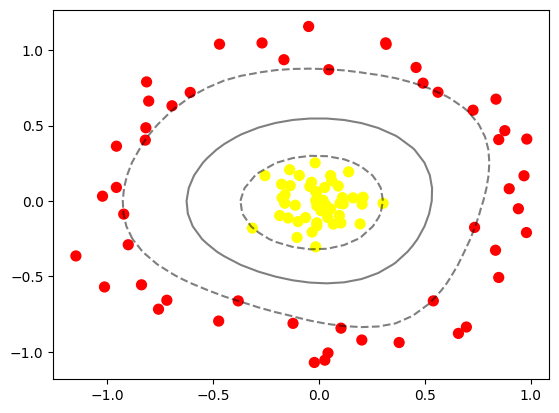

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')